<a href="https://colab.research.google.com/github/Kyrylo-Bakumenko/NFL-Stats/blob/main/stat_data_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import probplot

# Procuring and Formatting our Data

 First we import data from the excel sheet "2019_stats_NFL" from https://www.nfl.com/standings/league/2019/reg/ and put it in a pandas DataFrame for further manipulation.

In [121]:
wd = pd.read_excel("/content/2019_stats_NFL.xlsx", "Sheet1", header=None).loc[:, 0:7]
wd

,0,1,2,3,4,5,6,7
0,Baltimore Ravens logo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Baltimore Ravens,14.0,2.0,0.0,0.875,531.0,282.0,249.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
110,Washington Redskins logo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,Washington Redskins,3.0,13.0,0.0,0.188,266.0,435.0,-169.0
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,Cincinnati Bengals logo,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Clean the data up a bit . . .


In [122]:
wd = wd.rename(index=wd.loc[:, 0])
wd = wd.drop(columns=[0])
wd = wd.rename(columns={1 : 'Wins', 2: 'Losses', 3: 'T', 4: 'PCT', 5:'For', 6:'Against', 7: "Net"})
wd.dropna(inplace=True)
wd.drop(columns=["T"], inplace=True)
wd

,Wins,Losses,PCT,For,Against,Net
Baltimore Ravens,14.0,2.0,0.875,531.0,282.0,249.0
Green Bay Packers,13.0,3.0,0.813,376.0,313.0,63.0
New Orleans Saints,13.0,3.0,0.813,458.0,341.0,117.0
San Francisco 49ers,13.0,3.0,0.813,479.0,310.0,169.0
Kansas City Chiefs,12.0,4.0,0.750,451.0,308.0,143.0
New England Patriots,12.0,4.0,0.750,420.0,225.0,195.0
Seattle Seahawks,11.0,5.0,0.688,405.0,398.0,7.0
Buffalo Bills,10.0,6.0,0.625,314.0,259.0,55.0
Houston Texans,10.0,6.0,0.625,378.0,385.0,-7.0
Minnesota Vikings,10.0,6.0,0.625,407.0,303.0,104.0


Now we can start our analysis of NFL team wins, points for, and net points with the help of some visuals!

# Frequency and Relative Frequency Tables

### Relative frequency:

In [123]:
wf = wd["Wins"].value_counts(normalize = True, bins = 6).sort_index();
rf = pd.DataFrame({"Wins": wf.index, "Relative Frequency":wf.values})
rf

,Wins,Relative Frequency
0,"(1.987, 4.0]",0.12500
1,"(4.0, 6.0]",0.18750
2,"(6.0, 8.0]",0.28125
3,"(8.0, 10.0]",0.18750
4,"(10.0, 12.0]",0.09375
5,"(12.0, 14.0]",0.12500


In [124]:
wf = wd["For"].value_counts(normalize = True, bins = 6).sort_index();
rf = pd.DataFrame({"Points For": wf.index, "Relative Frequency":wf.values})
rf

,Points For,Relative Frequency
0,"(265.73400000000004, 310.167]",0.25000
1,"(310.167, 354.333]",0.21875
2,"(354.333, 398.5]",0.21875
3,"(398.5, 442.667]",0.15625
4,"(442.667, 486.833]",0.12500
5,"(486.833, 531.0]",0.03125


In [125]:
wf = wd["Net"].value_counts(normalize = True, bins = 6).sort_index();
rf = pd.DataFrame({"Net Points": wf.index, "Relative Frequency":wf.values})
rf

,Net Points,Relative Frequency
0,"(-188.43800000000002, -115.167]",0.12500
1,"(-115.167, -42.333]",0.21875
2,"(-42.333, 30.5]",0.31250
3,"(30.5, 103.333]",0.12500
4,"(103.333, 176.167]",0.15625
5,"(176.167, 249.0]",0.06250


### Frequency Tables:

In [126]:
wf = wd["Wins"].value_counts().sort_index();
rf = pd.DataFrame({"Wins": wf.index, "Count":wf.values})
rf

,Wins,Count
0,2.0,1
1,3.0,2
2,4.0,1
3,5.0,4
4,6.0,2
5,7.0,6
6,8.0,3
7,9.0,3
8,10.0,3
9,11.0,1


In [127]:
wf = wd["For"].value_counts(bins = 6).sort_index();
rf = pd.DataFrame({"Points For": wf.index, "Count":wf.values})
rf

,Points For,Count
0,"(265.73400000000004, 310.167]",8
1,"(310.167, 354.333]",7
2,"(354.333, 398.5]",7
3,"(398.5, 442.667]",5
4,"(442.667, 486.833]",4
5,"(486.833, 531.0]",1


In [128]:
wf = wd["Net"].value_counts(bins = 6).sort_index();
rf = pd.DataFrame({"Net Points": wf.index, "Count": wf.values})
rf

,Net Points,Count
0,"(-188.43800000000002, -115.167]",4
1,"(-115.167, -42.333]",7
2,"(-42.333, 30.5]",10
3,"(30.5, 103.333]",4
4,"(103.333, 176.167]",5
5,"(176.167, 249.0]",2


# Histogram Graphs

The distribution of wins in the NFL 2019 season appears to be slightly right skewed shown by the mean (7.97) slightly exceeding the median (7.5). With a standard deviation of 3.16 wins and every season win lying within two standard deviations of the mean, this distribution is also more center clustered than a normal distribution; however, it is almost normal with the average discrepancy from the empirical being only 2%.

Mean: 7.97
Median: 7.5
Range: 12.0
Standard Deviation: 3.16
Empirical Expectations (%): 68, 95, 99.7
Actual (%):  68.8 100.0 100.0
Average from Empirical (%):  2.0


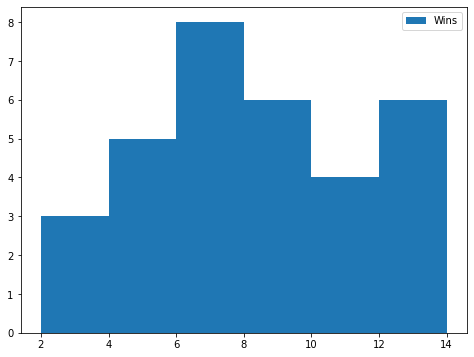

In [146]:
var = "Wins"
wd[var].hist(bins=6, grid=False, figsize=(8, 6), legend=True);
print("Mean:", round(np.mean(wd[var]), 2))
print("Median:", np.median(wd[var]))
print("Range:", np.ptp(wd[var]))
print("Standard Deviation:", round(np.std(wd[var]), 2))
print("Empirical Expectations (%): 68, 95, 99.7")
a = round(np.count_nonzero(np.abs(wd[var] - np.mean(wd[var])) < np.std(wd[var]))/len(wd[var]), 3)*100
b = round(np.count_nonzero(np.abs(wd[var] - np.mean(wd[var])) < 2*np.std(wd[var]))/len(wd[var]), 3)*100
c = round(np.count_nonzero(np.abs(wd[var] - np.mean(wd[var])) < 3*np.std(wd[var]))/len(wd[var]), 3)*100
print("Actual (%): ", a, b, c)
print("Average from Empirical (%): ", round((np.abs(a - 68) + np.abs(b - 95) + np.abs(c - 99.7))/3, 1))

The distribution of points for a NFL 2019 season team is slightly right skewed with the mean (365) just exceeding the median (361). The distribution is also more focoused ont he extremes than normal as seen in the population of scores within 1 standard deviation being less than in an empirical distribution but scores exceeding 2 standard deviaitons from the mean are more frequent than in empirical distributions.

Mean: 365.0
Median: 361.0
Range: 265.0
Standard Deviation: 66.39
Empirical Expectations (%): 68, 95, 99.7
Actual (%):  62.5 96.89999999999999 100.0
Average from Empirical (%):  2.6


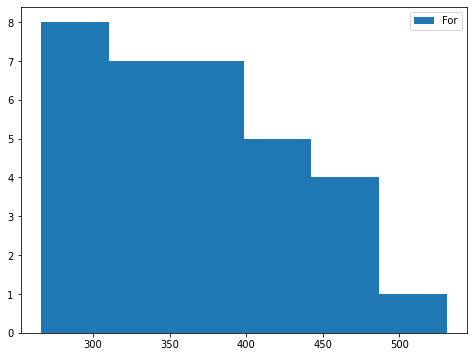

In [147]:
var = "For"
wd[var].hist(bins=6, grid=False, figsize=(8, 6), legend=True);
print("Mean:", round(np.mean(wd[var]), 2))
print("Median:", np.median(wd[var]))
print("Range:", np.ptp(wd[var]))
print("Standard Deviation:", round(np.std(wd[var]), 2))
print("Empirical Expectations (%): 68, 95, 99.7")
a = round(np.count_nonzero(np.abs(wd[var] - np.mean(wd[var])) < np.std(wd[var]))/len(wd[var]), 3)*100
b = round(np.count_nonzero(np.abs(wd[var] - np.mean(wd[var])) < 2*np.std(wd[var]))/len(wd[var]), 3)*100
c = round(np.count_nonzero(np.abs(wd[var] - np.mean(wd[var])) < 3*np.std(wd[var]))/len(wd[var]), 3)*100
print("Actual (%): ", a, b, c)
print("Average from Empirical (%): ", round((np.abs(a - 68) + np.abs(b - 95) + np.abs(c - 99.7))/3, 1))

The distribution of net points in the NFL 2019 season appears to be roughly symmetrical with the difference between mean (0) and median (-10) being almost negligible negligible in comparison to range (437) and standard deviation (106). Furthermore, this distribution is roughly normal, with the distribution discrepancies between actual and empirical being only 1.5% on average.

Mean: 0.0
Median: -10.0
Range: 437.0
Standard Deviation: 106.0
Empirical Expectations (%): 68, 95, 99.7
Actual (%):  65.60000000000001 96.89999999999999 100.0
Average from Empirical (%):  1.5


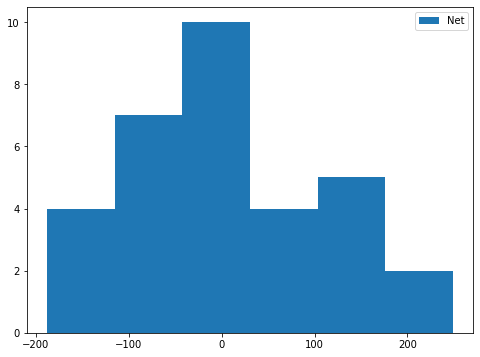

In [148]:
var = "Net"
wd[var].hist(bins=6, grid=False, figsize=(8, 6), legend=True);
print("Mean:", round(np.mean(wd[var]), 2))
print("Median:", np.median(wd[var]))
print("Range:", np.ptp(wd[var]))
print("Standard Deviation:", round(np.std(wd[var]), 2))
print("Empirical Expectations (%): 68, 95, 99.7")
a = round(np.count_nonzero(np.abs(wd[var] - np.mean(wd[var])) < np.std(wd[var]))/len(wd[var]), 3)*100
b = round(np.count_nonzero(np.abs(wd[var] - np.mean(wd[var])) < 2*np.std(wd[var]))/len(wd[var]), 3)*100
c = round(np.count_nonzero(np.abs(wd[var] - np.mean(wd[var])) < 3*np.std(wd[var]))/len(wd[var]), 3)*100
print("Actual (%): ", a, b, c)
print("Average from Empirical (%): ", round((np.abs(a - 68) + np.abs(b - 95) + np.abs(c - 99.7))/3, 1))

# Normal Probability Plot

The Normal Probability Plot apears to be nearly linear with little deviation; thus, it can be inferred that  the distribution of wins in the 2019 Season of the NFL was approximately normal.

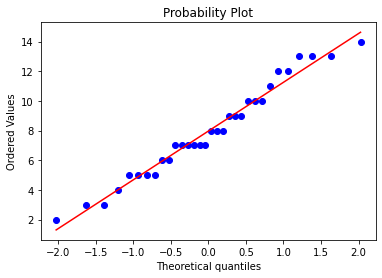

In [140]:
probplot(wd["Wins"], plot = plt)
plt.show()

The Normal Probability Plot apears to be slightly linear with some deviation; thus, it can be inferred that  the distribution of For Points in the 2019 Season of the NFL is only slightly normal and deviates from the expected at the extremes.

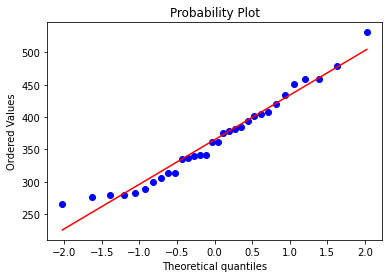

In [143]:
probplot(wd["For"], plot = plt)
plt.show()

The Normal Probability Plot apears to be nearly linear with little deviation; thus, it can be inferred that the distribution of Net Points in the 2019 Season of the NFL was approximately normal.

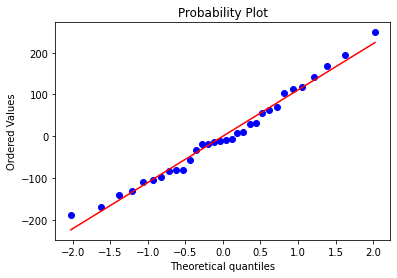

In [142]:
probplot(wd["Net"], plot = plt)
plt.show()

# Conclusion

We can learn that most distributions in the NFL are roughly normal. This may seem unexpected as I had expected points to be right skewed. However, it makes sense that Net points be perfectly centered at 0 (mean) when considering the whole league, sicne every point lost is a point gained for another team; thus to get takeaways we must look at how wins and points were distributed instea dof their center. Something I found interesting was that 68.8% of teams were within oen standard deviation of the mean in respect to wins, but only 62.5% were within one standard deviaiton of the mean for points scored whilst exceeding the empirical dsitribution with data outside one and two standard deviations. From this phenonema we can infer that most teams and wins in the middle of the league rankings were low scoring, whilst those on wither the top or bottom trended to have blowout performances in terms of points greater than they would be expected by their win percentage alone.